In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qmc import *
from functions import *
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex = True)

/Users/bendik/drive/uio/10.semester/fys4411/projects/python /Users/bendik/drive/uio/10.semester/fys4411/projects /Users/bendik/drive/uio/10.semester/fys4411/projects/include
Found libraries: ['/var/folders/69/n7l285595sz0cdm799b9lnfm0000gn/T/qmc_y1328wx/libengine.dylib']
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/hamiltonian.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/prettyprint.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/rbm.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/combinedcalculator.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/vector.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/system.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/wavefunction.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/include/vmc.hpp
Loading /Users/bendik/drive/uio/10.semester/fys4411/projects/inclu

# Utility Functions

In [2]:
def training_plot(rbm, H, sampler, iters, samples, lr, gamma, plot_density=100, saveas=None):
    E = []
    param = []
    for _ in range(iters):
        rbm.train(H, sampler, 1, samples, lr, gamma, False)
        E.append(np.mean([H.local_energy(sampler.next_configuration(), rbm) for _ in range(samples)]))
        param.append(vector_to_array(rbm.get_parameters()))
    
    param = np.asarray(param)
    fig, ax = plt.subplots(sharex=True, nrows=2, ncols=1, figsize=figsize)
    ax[0].plot(E[::iters//plot_density], label=r'$\langle E_L\rangle$')
    ax[0].set_ylabel(r'$\langle E_L\rangle$ [a.u.]', fontsize=axis_fontsize-5)
    for i in range(rbm.get_parameters().size()):
        ax[1].plot(param[:,i][::iters//plot_density], label=r'$\alpha_{%d}$' % i)
    ax[1].set_xlabel(f'Training iterations (x{iters//plot_density})', fontsize=axis_fontsize-5)
    plt.legend(fontsize=title_fontsize-5)
    
    if saveas:
        plt.savefig(saveas)

# One electron, 1D

In [3]:
P, D = 1, 1
M = 1
N = 2
sigma2 = 1
system = System(P, D)
H = RBMHarmonicOscillatorHamiltonian()

# Standard Metropolis

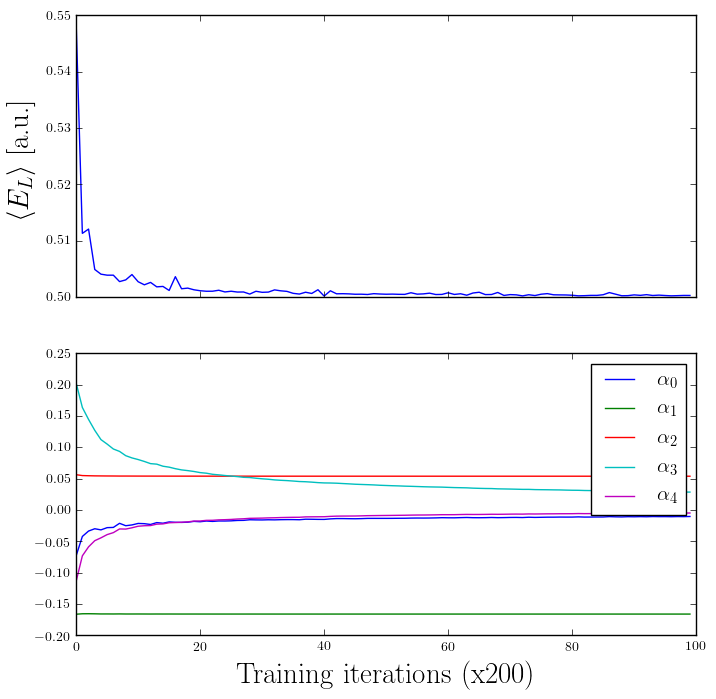

In [4]:
rbm = RBMWavefunction(M, N, sigma2)
initial_params = array_to_vector(vector_to_array(rbm.get_parameters()))  # Copy for later use.
sampler = MetropolisSampler(system, rbm, 0.5)
training_plot(rbm, H, sampler, 20000, 100, 0.9, 0.0, saveas='../results/rbm-1d-1p-training-lr-09-metro.png')

In [5]:
E = np.asarray([H.local_energy(sampler.next_configuration(), rbm) for _ in range(2**15)])
np.mean(E), np.var(E), blocking(E)

(0.50032831235090991, 2.1390085877850976e-08, 5.630558603365868e-06)

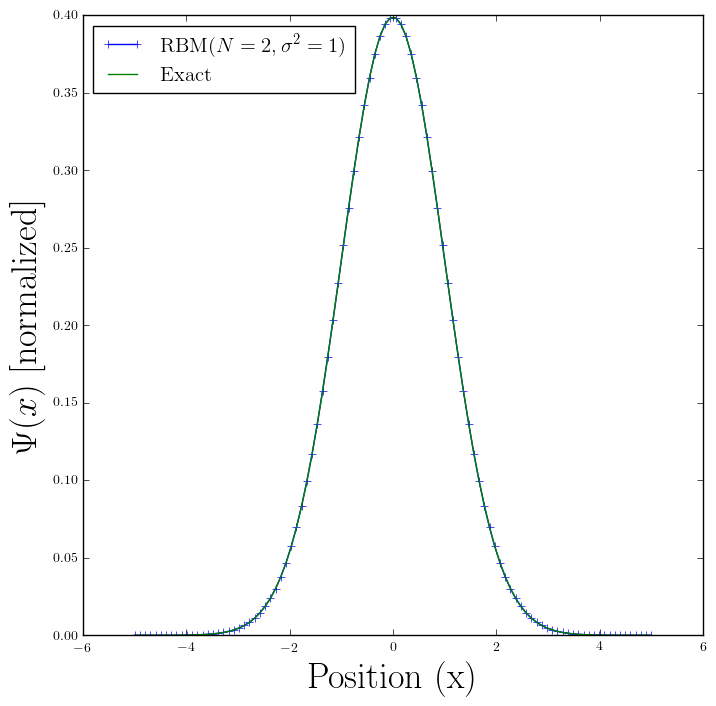

In [6]:
x_array = np.linspace(-5, 5, 100)
s_array = np.asarray([array_to_system(np.array([[x]])) for x in x_array])

learned = np.asarray([rbm(s_i) for s_i in s_array])
learned_norm = learned / np.trapz(learned, x=x_array)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x_array, learned_norm, '-+', label=f'RBM($N={N}, \sigma^2 = {sigma2}$)')
ax.plot(x_array, (2*np.pi)**(-0.5) * np.exp(-0.5 * x_array**2), label='Exact')
ax.set_xlabel('Position (x)', fontsize=axis_fontsize)
ax.set_ylabel(r'$\Psi(x)$ [normalized]', fontsize=axis_fontsize)
plt.legend(fontsize=title_fontsize-5, loc='upper left')
plt.savefig('../results/rbm-1d-1p.png')

## Importance Sampling

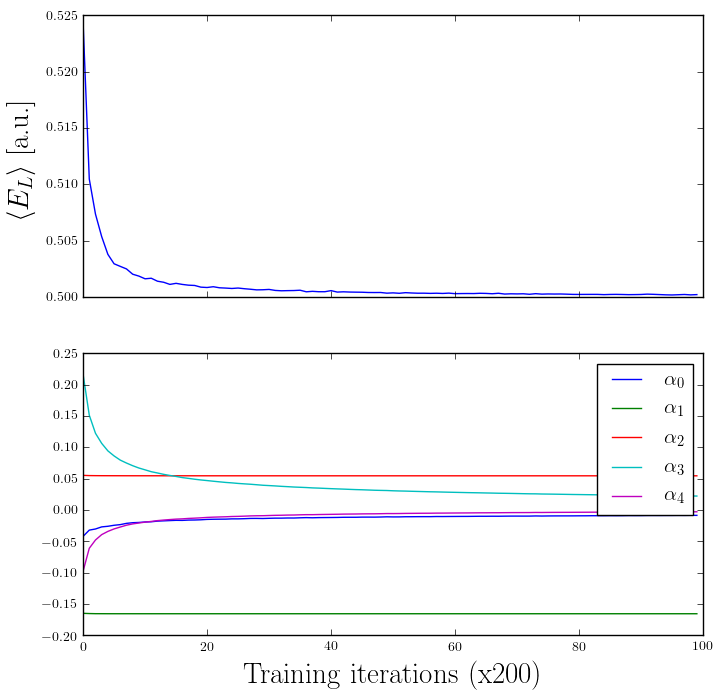

In [7]:
rbm = RBMWavefunction(M, N, sigma2)
rbm.set_parameters(initial_params)
sampler = ImportanceSampler(system, rbm, 0.5)
training_plot(rbm, H, sampler, 20000, 100, 0.9, 0.0, saveas='../results/rbm-1d-1p-training-lr-09-imp.png')

In [8]:
E = np.asarray([H.local_energy(sampler.next_configuration(), rbm) for _ in range(2**15)])
np.mean(E), np.var(E), blocking(E)

(0.50019533086810852, 1.3859179152406621e-08, 9.626690795658227e-07)